# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
    #lat={lat}&lon={lon}&exclude={part}&appid={API key}
#"http://api.openweathermap.org/data/3.0/weather?"
#units = "metric"

# Build partial query URL
#query_url = f"{url}appid={api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    city_url =f"{url}q={city}&appid={weather_api_key}"

    #f"{url}appid={weather_api_key}&cities={city}&q="

    #url + "appid=" + weather_api_key + "&q=" + city 
    #f"{url}appid={weather_api_key}&units={units}&q="


    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | santa elena
Processing Record 3 of Set 1 | langres
Processing Record 4 of Set 1 | shestakovo
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ballymena
Processing Record 8 of Set 1 | vanimo
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | harper
Processing Record 11 of Set 1 | jimma
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | abha
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | ribeira brava
Processing Record 17 of Set 1 | santa catalina
Processing Record 18 of Set 1 | half moon bay
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | togur
Processing Record 23 of Set 1 | air

Processing Record 38 of Set 4 | khatassy
Processing Record 39 of Set 4 | amarpur
Processing Record 40 of Set 4 | rabo de peixe
Processing Record 41 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | obala
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | tawang
Processing Record 46 of Set 4 | superior
Processing Record 47 of Set 4 | hoi an
Processing Record 48 of Set 4 | bondo
Processing Record 49 of Set 4 | portland
Processing Record 0 of Set 5 | dingle
Processing Record 1 of Set 5 | samarai
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | roald
Processing Record 6 of Set 5 | forest park
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | puerto el triunfo
Processing Record 9 of Set 5 | bambous virieux
Processing Record 10 of Set 5 | manokwari
Processing Record 11 of 

Processing Record 27 of Set 8 | qui nhon
Processing Record 28 of Set 8 | turukhansk
Processing Record 29 of Set 8 | dinanagar
Processing Record 30 of Set 8 | horta
Processing Record 31 of Set 8 | pangoa
Processing Record 32 of Set 8 | zhanaozen
Processing Record 33 of Set 8 | bokspits
City not found. Skipping...
Processing Record 34 of Set 8 | balti
Processing Record 35 of Set 8 | tautira
Processing Record 36 of Set 8 | san jose
Processing Record 37 of Set 8 | prince rupert
Processing Record 38 of Set 8 | talara
Processing Record 39 of Set 8 | medford
Processing Record 40 of Set 8 | malkara
Processing Record 41 of Set 8 | olinda
Processing Record 42 of Set 8 | ostrovnoy
Processing Record 43 of Set 8 | kahului
Processing Record 44 of Set 8 | lodja
Processing Record 45 of Set 8 | pisticci
Processing Record 46 of Set 8 | kokopo
Processing Record 47 of Set 8 | norman wells
Processing Record 48 of Set 8 | henties bay
Processing Record 49 of Set 8 | edd
Processing Record 0 of Set 9 | sainte-

Processing Record 17 of Set 12 | santa maria
Processing Record 18 of Set 12 | ambilobe
Processing Record 19 of Set 12 | saint-amand-les-eaux
Processing Record 20 of Set 12 | mezen
Processing Record 21 of Set 12 | zachary
Processing Record 22 of Set 12 | xinqing
Processing Record 23 of Set 12 | bad aibling
Processing Record 24 of Set 12 | port blair
Processing Record 25 of Set 12 | iracoubo
Processing Record 26 of Set 12 | warud
Processing Record 27 of Set 12 | pangai
Processing Record 28 of Set 12 | lingyuan
Processing Record 29 of Set 12 | saint-louis
Processing Record 30 of Set 12 | cornelio procopio
Processing Record 31 of Set 12 | athabasca
Processing Record 32 of Set 12 | chapais
Processing Record 33 of Set 12 | kloulklubed
Processing Record 34 of Set 12 | stokmarknes
Processing Record 35 of Set 12 | abu dhabi
Processing Record 36 of Set 12 | mango
Processing Record 37 of Set 12 | saint-georges
Processing Record 38 of Set 12 | yulara
Processing Record 39 of Set 12 | sampit
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)



# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,283.86,91,25,4.29,CL,1680940476
1,santa elena,-2.2333,-80.8500,298.62,80,82,0.64,EC,1680940236
2,langres,47.8333,5.3333,280.00,84,7,2.96,FR,1680940477
3,shestakovo,56.4915,103.9600,267.17,56,100,4.35,RU,1680940477
4,new norfolk,-42.7826,147.0587,283.87,67,17,1.79,AU,1680940477


In [11]:
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 32) * 5/9
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,59.956790,9100,25,4.29,CL,1680940476
1,santa elena,-2.2333,-80.8500,64.512346,8000,82,0.64,EC,1680940236
2,langres,47.8333,5.3333,58.765432,8400,7,2.96,FR,1680940477
3,shestakovo,56.4915,103.9600,54.805556,5600,100,4.35,RU,1680940477
4,new norfolk,-42.7826,147.0587,59.959877,6700,17,1.79,AU,1680940477


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data1/cities1.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data1/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,139.922222,91,25,4.29,CL,1680940476
1,santa elena,-2.2333,-80.8500,148.122222,80,82,0.64,EC,1680940236
2,langres,47.8333,5.3333,137.777778,84,7,2.96,FR,1680940477
3,shestakovo,56.4915,103.9600,130.650000,56,100,4.35,RU,1680940477
4,new norfolk,-42.7826,147.0587,139.927778,67,17,1.79,AU,1680940477


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

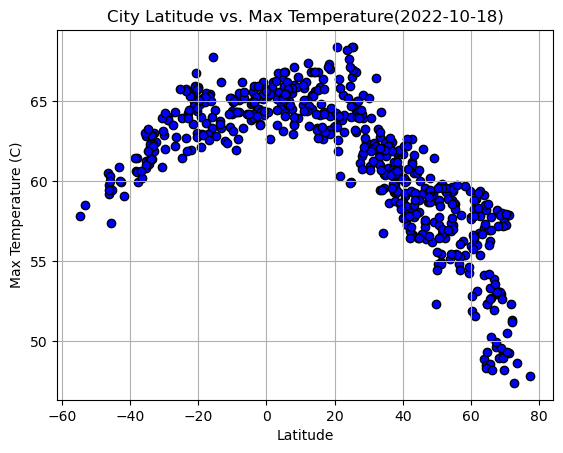

In [14]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df["Lat"].astype("float")
y_values=city_data_df["Max Temp"].astype("float")

plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black",)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature(2022-10-18)")
plt.grid()
#plt.ylim(-20,40)

# Save the figure
plt.savefig("output_data1/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

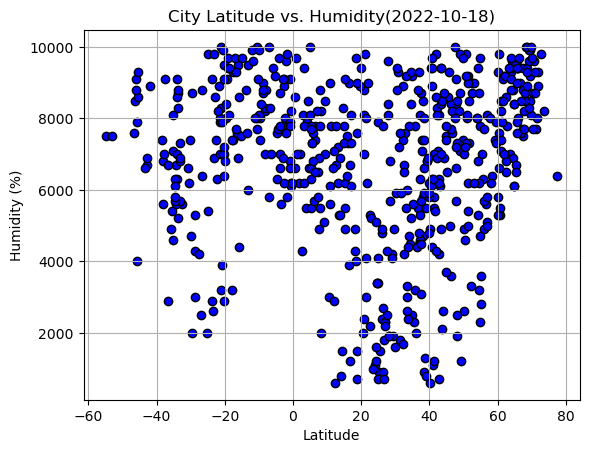

In [20]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df["Lat"].astype("float")
y_values=city_data_df["Humidity"].astype("float")

plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black",)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.grid()


# Save the figure
plt.savefig("output_data1/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

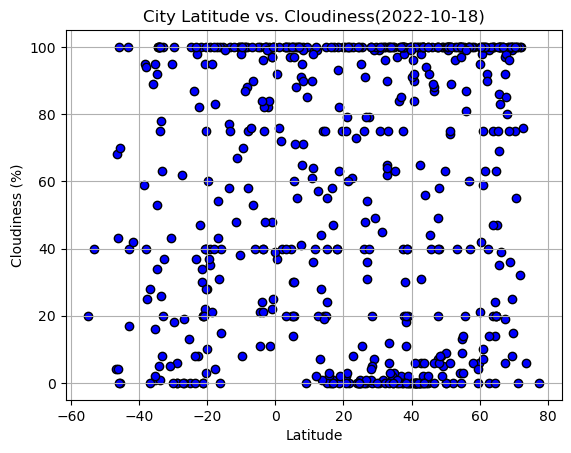

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df["Lat"].astype("float")
y_values=city_data_df["Cloudiness"].astype("float")

plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black",)


# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("output_data1/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

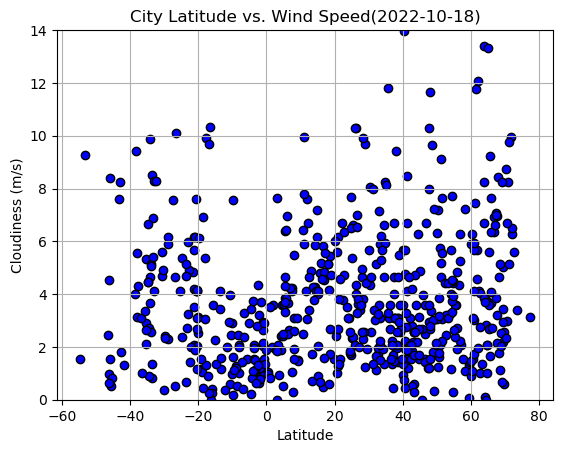

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df["Lat"].astype("float")
y_values=city_data_df["Wind Speed"].astype("float")

plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black",)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (m/s)")
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.ylim(0,14)
plt.grid()

# Save the figure
plt.savefig("output_data1/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,langres,47.8333,5.3333,58.765432,8400,7,2.96,FR,1680940477
3,shestakovo,56.4915,103.9600,54.805556,5600,100,4.35,RU,1680940477
6,ballymena,54.8636,-6.2763,59.404321,7800,100,4.41,GB,1680940243
9,harper,4.3750,-7.7169,64.888889,8500,97,2.40,LR,1680940479
10,jimma,7.6667,36.8333,64.487654,4900,41,1.04,ET,1680940479


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,59.956790,9100,25,4.29,CL,1680940476
1,santa elena,-2.2333,-80.8500,64.512346,8000,82,0.64,EC,1680940236
4,new norfolk,-42.7826,147.0587,59.959877,6700,17,1.79,AU,1680940477
5,ushuaia,-54.8000,-68.3000,57.827160,7500,20,1.54,AR,1680940478
7,vanimo,-2.6741,141.3028,64.515432,8900,100,0.86,PG,1680940478


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7561094480760182


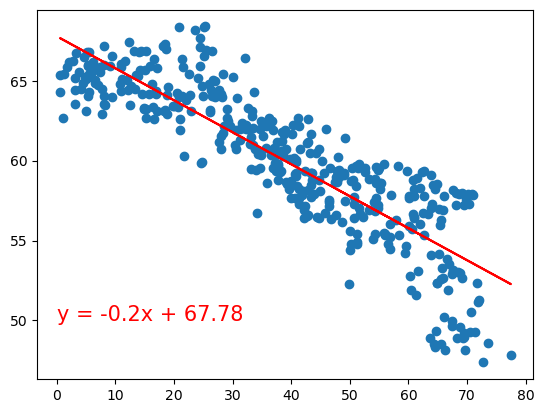

In [62]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"].astype("float")
y_values=northern_hemi_df["Max Temp"].astype("float")
x_label="Latitude"
y_label="Max Temp"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.5652472587419874


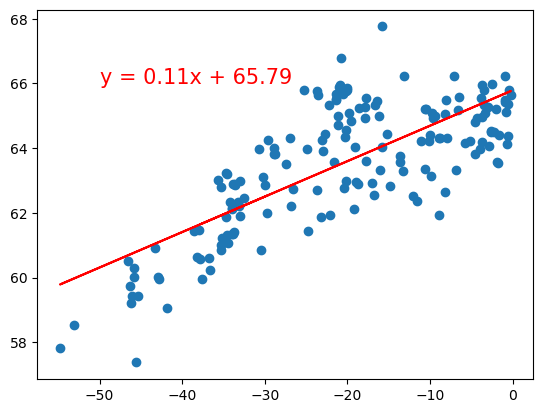

In [67]:
# Linear regression on Southern Hemisphere

x_values=southern_hemi_df["Lat"].astype("float")
y_values=southern_hemi_df["Max Temp"].astype("float")
x_label="Latitude"
y_label="Max Temp"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,66),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.08777411577988159


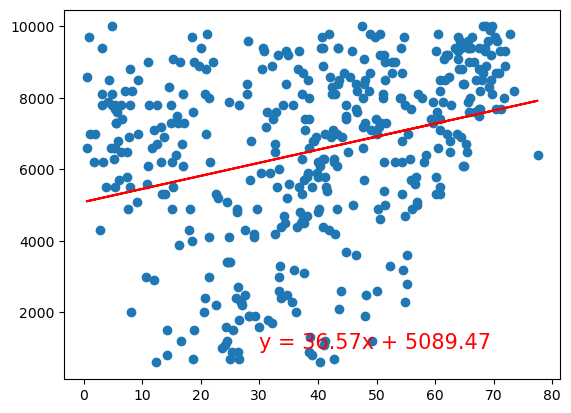

In [71]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"].astype("float")
y_values=northern_hemi_df["Humidity"].astype("float")
x_label="Latitude"
y_label="Humidity"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,1000),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.052589765472420356


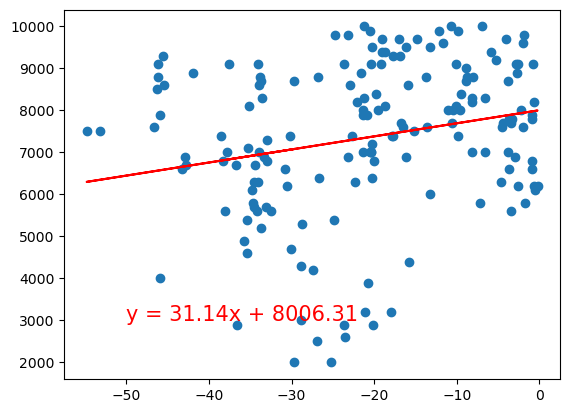

In [73]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"].astype("float")
y_values=southern_hemi_df["Humidity"].astype("float")
x_label="Latitude"
y_label="Humidity"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,3000),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.005742312419951302


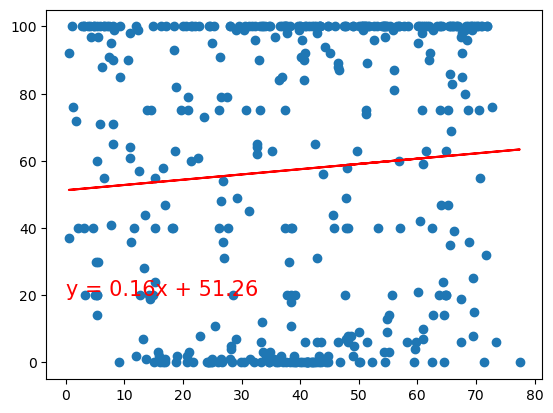

In [76]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"].astype("float")
y_values=northern_hemi_df["Cloudiness"].astype("float")
x_label="Latitude"
y_label="Cloudiness"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.08298469081267756


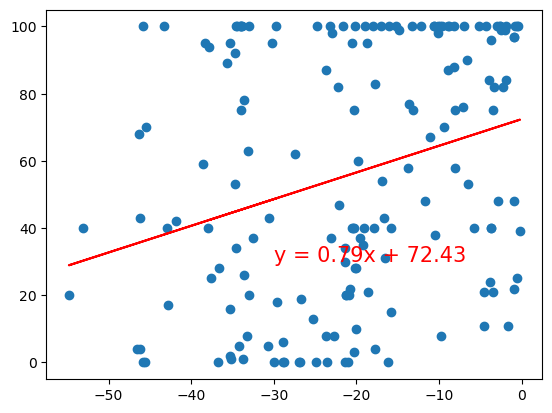

In [80]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"].astype("float")
y_values=southern_hemi_df["Cloudiness"].astype("float")
x_label="Latitude"
y_label="Cloudiness"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.01226415797630616


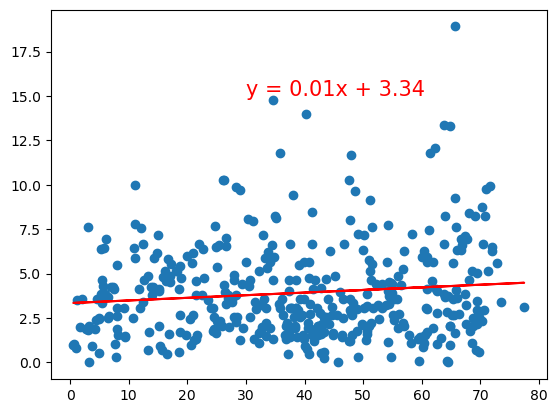

In [83]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"].astype("float")
y_values=northern_hemi_df["Wind Speed"].astype("float")
x_label="Latitude"
y_label="Wind Speed"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,15),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

R squared: 0.12187886050570798


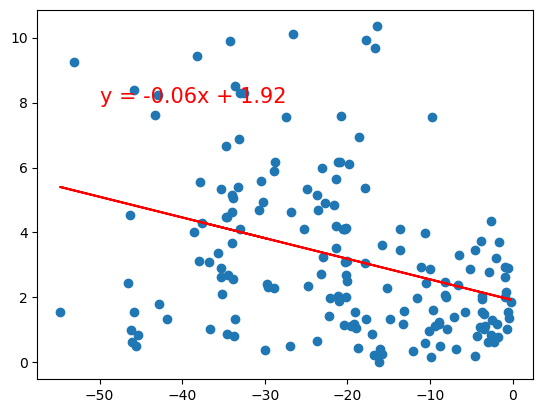

In [85]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"].astype("float")
y_values=southern_hemi_df["Wind Speed"].astype("float")
x_label="Latitude"
y_label="Wind Speed"

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#call linear function
create_linear_regression_plot(x_values, y_values, x_label, y_label)
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")

# Print r square value
print(f"R squared: {r_value**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE